In [279]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import sys
import cv2 as cv

%matplotlib inline
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.filters import sobel, prewitt, scharr
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops

### Reading the tiff file and selecting everything tenth frame

In [2]:
pwd

'/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/examples'

In [3]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [4]:
import irtemp

In [5]:
image = io.imread('../doc/TestVideo.tiff')

In [475]:
cap=cv.VideoCapture('../doc/TestVideo.tiff')

In [478]:
cap.read()

(True, array([[[114, 114, 114],
         [114, 114, 114],
         [114, 114, 114],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],
 
        [[114, 114, 114],
         [114, 114, 114],
         [114, 114, 114],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],
 
        [[114, 114, 114],
         [114, 114, 114],
         [114, 114, 114],
         ...,
         [115, 115, 115],
         [114, 114, 114],
         [114, 114, 114]],
 
        ...,
 
        [[115, 115, 115],
         [114, 114, 114],
         [114, 114, 114],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],
 
        [[114, 114, 114],
         [114, 114, 114],
         [114, 114, 114],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],
 
        [[114, 114, 114],
         [114, 114, 114],
         [114, 114, 114],
         ...,
         [114, 114, 11

In [6]:
image.shape

(18352, 120, 160)

In [7]:
selected_frames = image[0::10]

In [8]:
frames, height, width = selected_frames.shape
print(frames)
print(height)
print(width)

1836
120
160


/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


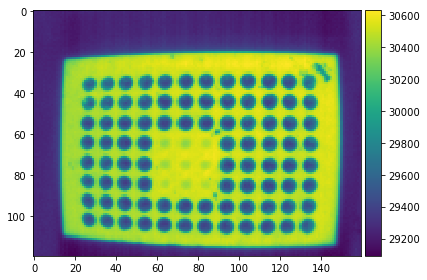

In [45]:
io.imshow(selected_frames[150])

In [275]:
crop = selected_frames[200][30:111,20:140]

In [82]:
io.imsave('crop_well.tiff',crop)

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: crop_well.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


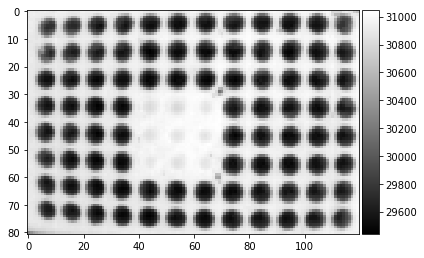

In [473]:
io.imshow(crop,cmap='gray')

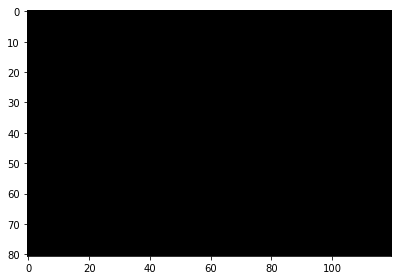

In [277]:
io.imshow(irtemp.edge_detection(crop,0))

In [479]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


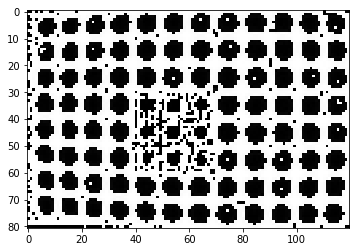

In [421]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [427]:
print(np.mean(out_l))

37076.38518518519


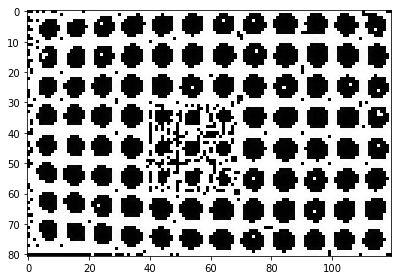

In [396]:
gaus = gaussian(out_l,sigma=0.01)
io.imshow(gaus,cmap='gray')

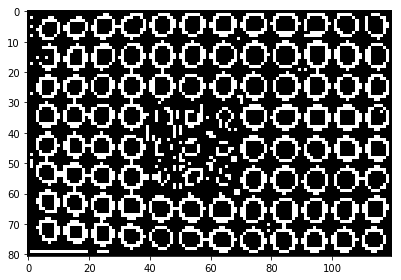

In [472]:
sob = sobel(gaus)>0.6
io.imshow(sob,cmap='gray')

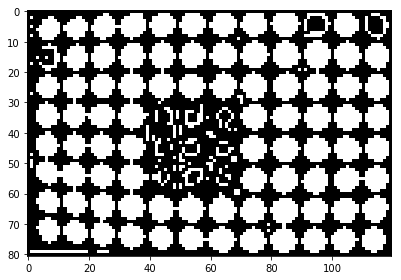

In [470]:
filled_wells = binary_fill_holes(sob)
io.imshow(filled_wells)

(-0.5, 119.5, 80.5, -0.5)

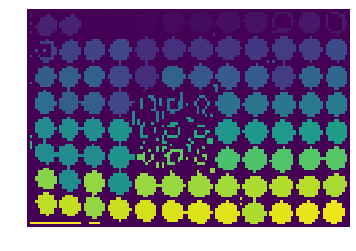

In [465]:
from skimage.measure import label

lab_wells = label(filled_wells)

fig, ax = plt.subplots()
ax.imshow(lab_wells*10, vmin=0)
ax.axis('off')

In [466]:
from skimage.measure import regionprops
import pandas as pd

props = regionprops(lab_wells, intensity_image=crop)
x = np.zeros(len(props))
y = np.zeros(len(props))
area = np.zeros(len(props))
perim = np.zeros(len(props))
intensity = np.zeros(len(props))

counter = 0
for prop in props:
    x[counter] = prop.centroid[0]
    y[counter] = prop.centroid[1]
    area[counter] = prop.area
    perim[counter] = prop.perimeter
    intensity[counter] = prop.mean_intensity
    
    counter += 1

regionprops = pd.DataFrame({'X': x, 'Y': y, 'Area': area,
                            'Perim': perim, 'Mean Intensity': intensity})

In [467]:
regionprops

,X,Y,Area,Perim,Mean Intensity
0,4.880734,29.752294,109.0,51.284271,30104.568807
1,4.472727,44.072727,55.0,25.313708,30019.545455
2,4.345455,54.072727,55.0,25.313708,29989.309091
3,4.345455,64.072727,55.0,25.313708,30010.163636
4,4.267857,74.250000,56.0,25.313708,30065.500000
5,4.275862,84.500000,58.0,26.142136,30041.568966
6,4.655172,94.655172,29.0,28.035534,30331.931034
7,4.433962,104.452830,53.0,23.899495,29991.962264
8,4.739130,114.608696,23.0,22.863961,30510.782609
9,2.000000,1.000000,1.0,0.000000,30931.000000


### Edge Detection

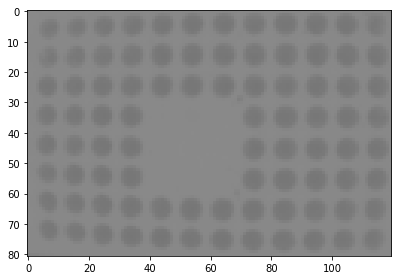

In [13]:
edge = []
for frame in selected_frames:
    frame = frame[30:111,20:140]
    edge.append(irtemp.edge_detection(frame, 0))
io.imshow(frame)

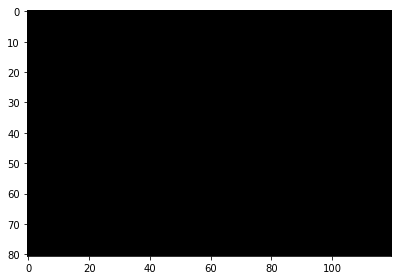

In [32]:
io.imshow(edge[0])